## 1. Veri Okuma

In [26]:
import pandas as pd

In [27]:
train_path = "C:/Users/ASUS/Desktop/Regression of Used Car Prices/train.csv"

test_path = "C:/Users/ASUS/Desktop/Regression of Used Car Prices/test.csv"

In [28]:
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [29]:
train_data.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [30]:
test_data.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


## 2. Veri Analizi - Detaylara Bakma

In [31]:
train_data.shape

(188533, 13)

In [32]:
train_data.info

<bound method DataFrame.info of             id          brand                     model  model_year  milage  \
0            0           MINI             Cooper S Base        2007  213000   
1            1        Lincoln                     LS V8        2002  143250   
2            2      Chevrolet         Silverado 2500 LT        2002  136731   
3            3        Genesis          G90 5.0 Ultimate        2017   19500   
4            4  Mercedes-Benz               Metris Base        2021    7388   
...        ...            ...                       ...         ...     ...   
188528  188528       Cadillac     Escalade ESV Platinum        2017   49000   
188529  188529  Mercedes-Benz  AMG C 43 AMG C 43 4MATIC        2018   28600   
188530  188530  Mercedes-Benz    AMG GLC 63 Base 4MATIC        2021   13650   
188531  188531           Audi          S5 3.0T Prestige        2022   13895   
188532  188532        Porsche                Macan Base        2016   59500   

            fuel_ty

In [33]:
train_data.isnull()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,False,False,False,False,False,False,False,False,False,False,False,False,False
188529,False,False,False,False,False,False,False,False,False,False,False,False,False
188530,False,False,False,False,False,False,False,False,False,False,False,False,False
188531,False,False,False,False,False,False,False,False,False,False,False,True,False


In [34]:
train_data.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [35]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,188533.0,94266.000000,54424.933488,0.0,47133.0,94266.0,141399.0,188532.0
model_year,188533.0,2015.829998,5.660967,1974.0,2013.0,2017.0,2020.0,2024.0
milage,188533.0,65705.295174,49798.158076,100.0,24115.0,57785.0,95400.0,405000.0
price,188533.0,43878.016178,78819.522254,2000.0,17000.0,30825.0,49900.0,2954083.0


In [36]:
train_data.dtypes

id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object

--------------------

In [37]:
test_data.shape

(125690, 12)

In [38]:
test_data.info

<bound method DataFrame.info of             id          brand                   model  model_year  milage  \
0       188533           Land          Rover LR2 Base        2015   98000   
1       188534           Land       Rover Defender SE        2020    9142   
2       188535           Ford      Expedition Limited        2022   28121   
3       188536           Audi           A6 2.0T Sport        2016   61258   
4       188537           Audi    A6 2.0T Premium Plus        2018   59000   
...        ...            ...                     ...         ...     ...   
125685  314218  Mercedes-Benz  GL-Class GL 450 4MATIC        2014   83315   
125686  314219           Audi          Q7 55 Prestige        2019   29336   
125687  314220           Audi    A6 3.0T Premium Plus        2012   77634   
125688  314221           Audi         Q7 3.0T Premium        2012  112000   
125689  314222      Chevrolet                Tahoe LT        2018   66840   

       fuel_type                           

In [39]:
test_data.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64

In [40]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,125690.0,251377.500000,36283.722005,188533.0,219955.25,251377.5,282799.75,314222.0
model_year,125690.0,2015.797526,5.673797,1974.0,2013.00,2017.0,2020.00,2024.0
milage,125690.0,66042.581510,50223.858435,100.0,24500.00,57500.0,95798.00,405000.0


In [41]:
test_data.dtypes

id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
dtype: object

## 3. Veri Görselleştirme ve Çıkarımlarda Bulunma

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


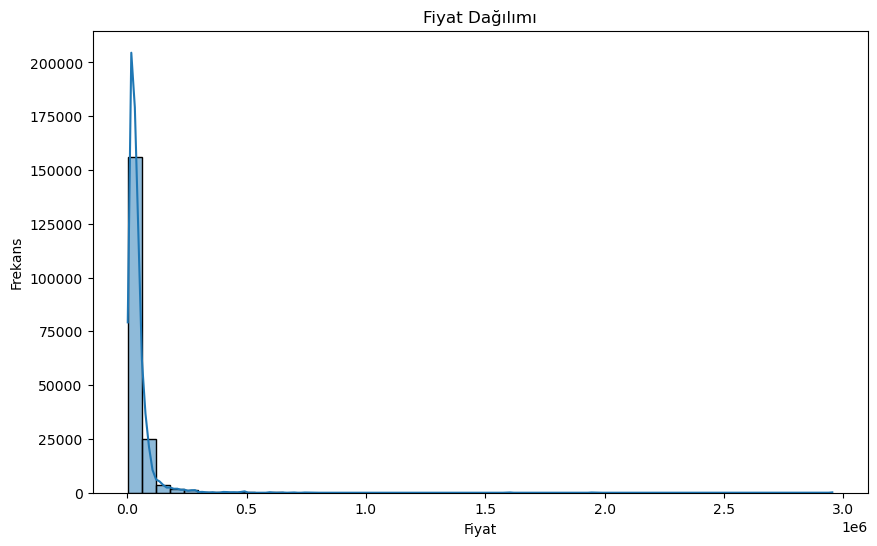

In [43]:
# Fiyat dağılımı
plt.figure(figsize=(10,6))
sns.histplot(train_data['price'], bins=50, kde=True)
plt.title('Fiyat Dağılımı')
plt.xlabel('Fiyat')
plt.ylabel('Frekans')
plt.show()

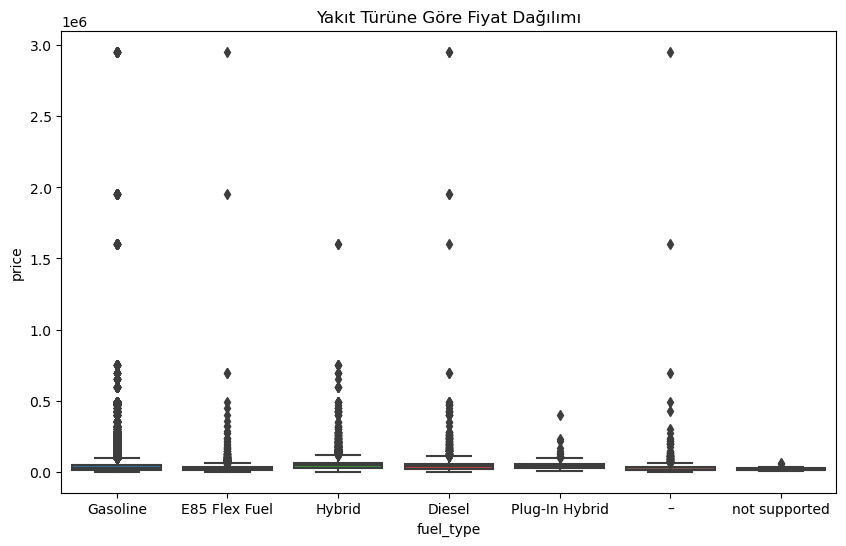

In [44]:
# Yakıt türüne göre fiyat dağılımı (Boxplot)
plt.figure(figsize=(10,6))
sns.boxplot(x='fuel_type', y='price', data=train_data)
plt.title('Yakıt Türüne Göre Fiyat Dağılımı')
plt.show()

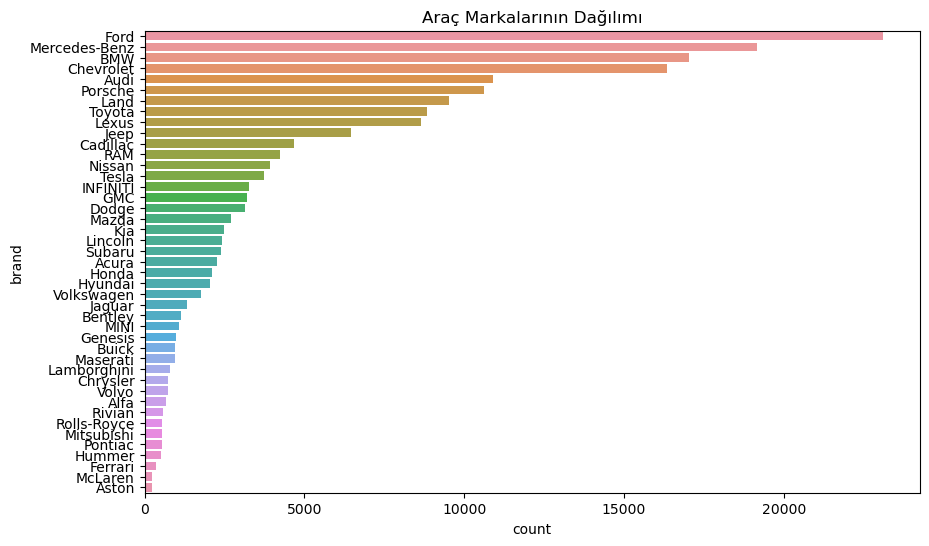

In [45]:
# Araç markalarının dağılımı
plt.figure(figsize=(10,6))
brand_counts = train_data["brand"].value_counts()  # Markaların frekanslarını al
brands_to_include = brand_counts[brand_counts > 150].index  # 3'ten fazla olanları filtrele
sns.countplot(y="brand", data=train_data[train_data["brand"].isin(brands_to_include)], order=brands_to_include)
plt.title("Araç Markalarının Dağılımı")
plt.show()

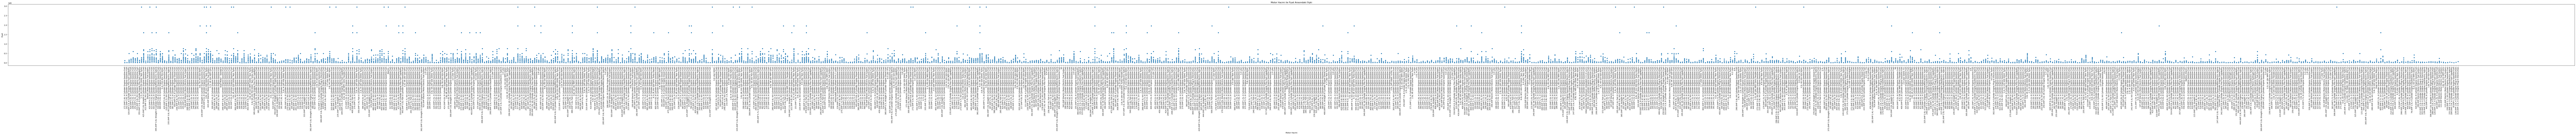

In [46]:
# Motor hacmi ile fiyat arasındaki ilişki
plt.figure(figsize=(250,6))
sns.scatterplot(x='engine', y='price', data=train_data)
plt.title('Motor Hacmi ile Fiyat Arasındaki İlişki')
plt.xticks(rotation=90)  # X eksenindeki etiketleri 45 derece döndür
plt.xlabel('Motor Hacmi')
plt.ylabel('Fiyat')
plt.show()

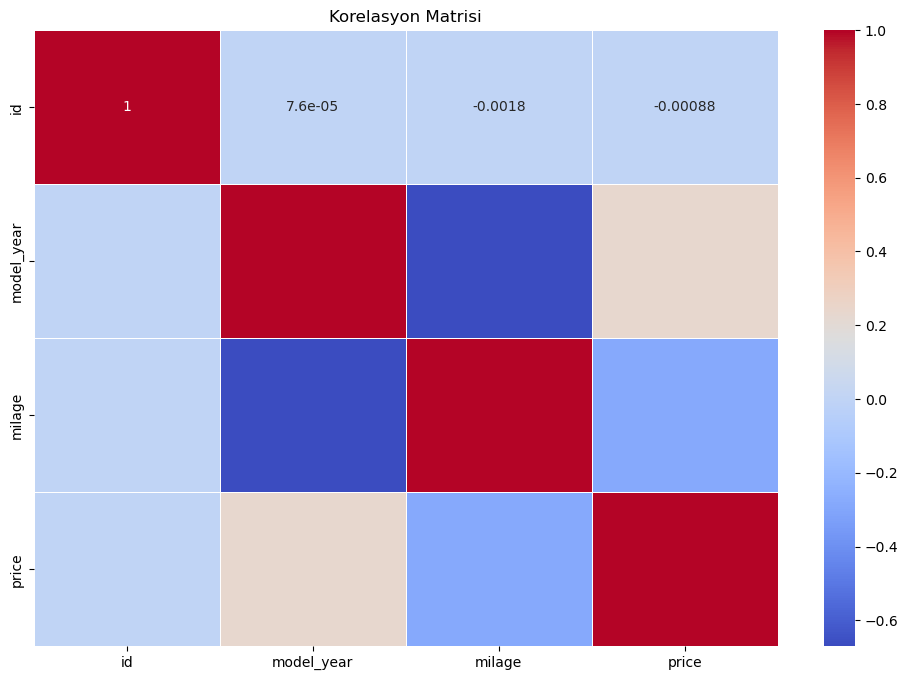

In [47]:
# Sayısal sütunları seç
numeric_data = train_data.select_dtypes(include=[float, int])

# Korelasyon matrisini hesapla
corr_matrix = numeric_data.corr()

# Korelasyon matrisini görselleştir
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()


C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


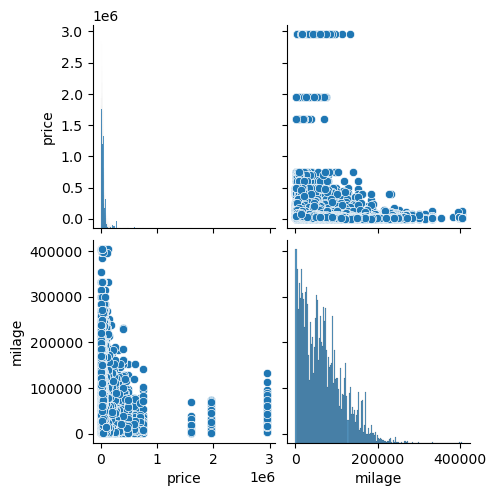

In [48]:
# Sayısal sütunlar arasındaki ilişkiler (pairplot)
sns.pairplot(train_data[["price", "engine","milage"]])
plt.show()

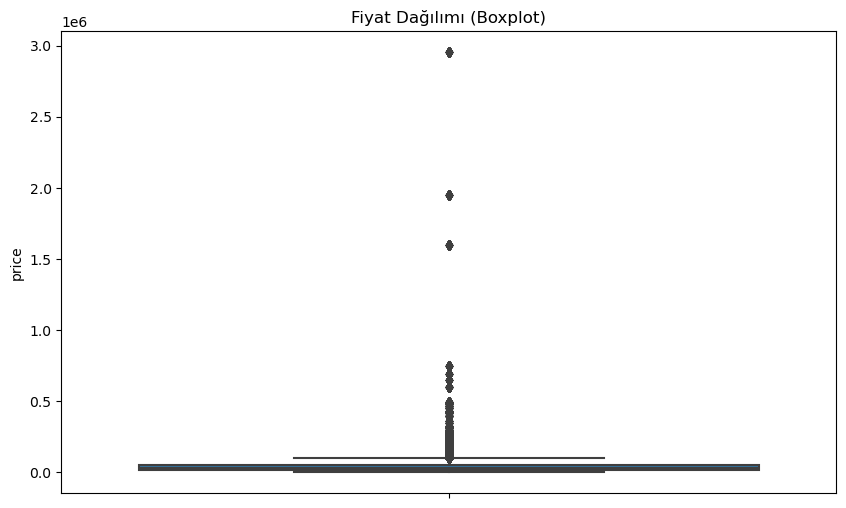

In [49]:
# Fiyat dağılımı (boxplot)
plt.figure(figsize=(10,6))
sns.boxplot(y="price", data = train_data)
plt.title("Fiyat Dağılımı (Boxplot)")
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


ValueError: could not convert string to float: '--'

<Figure size 1000x600 with 0 Axes>

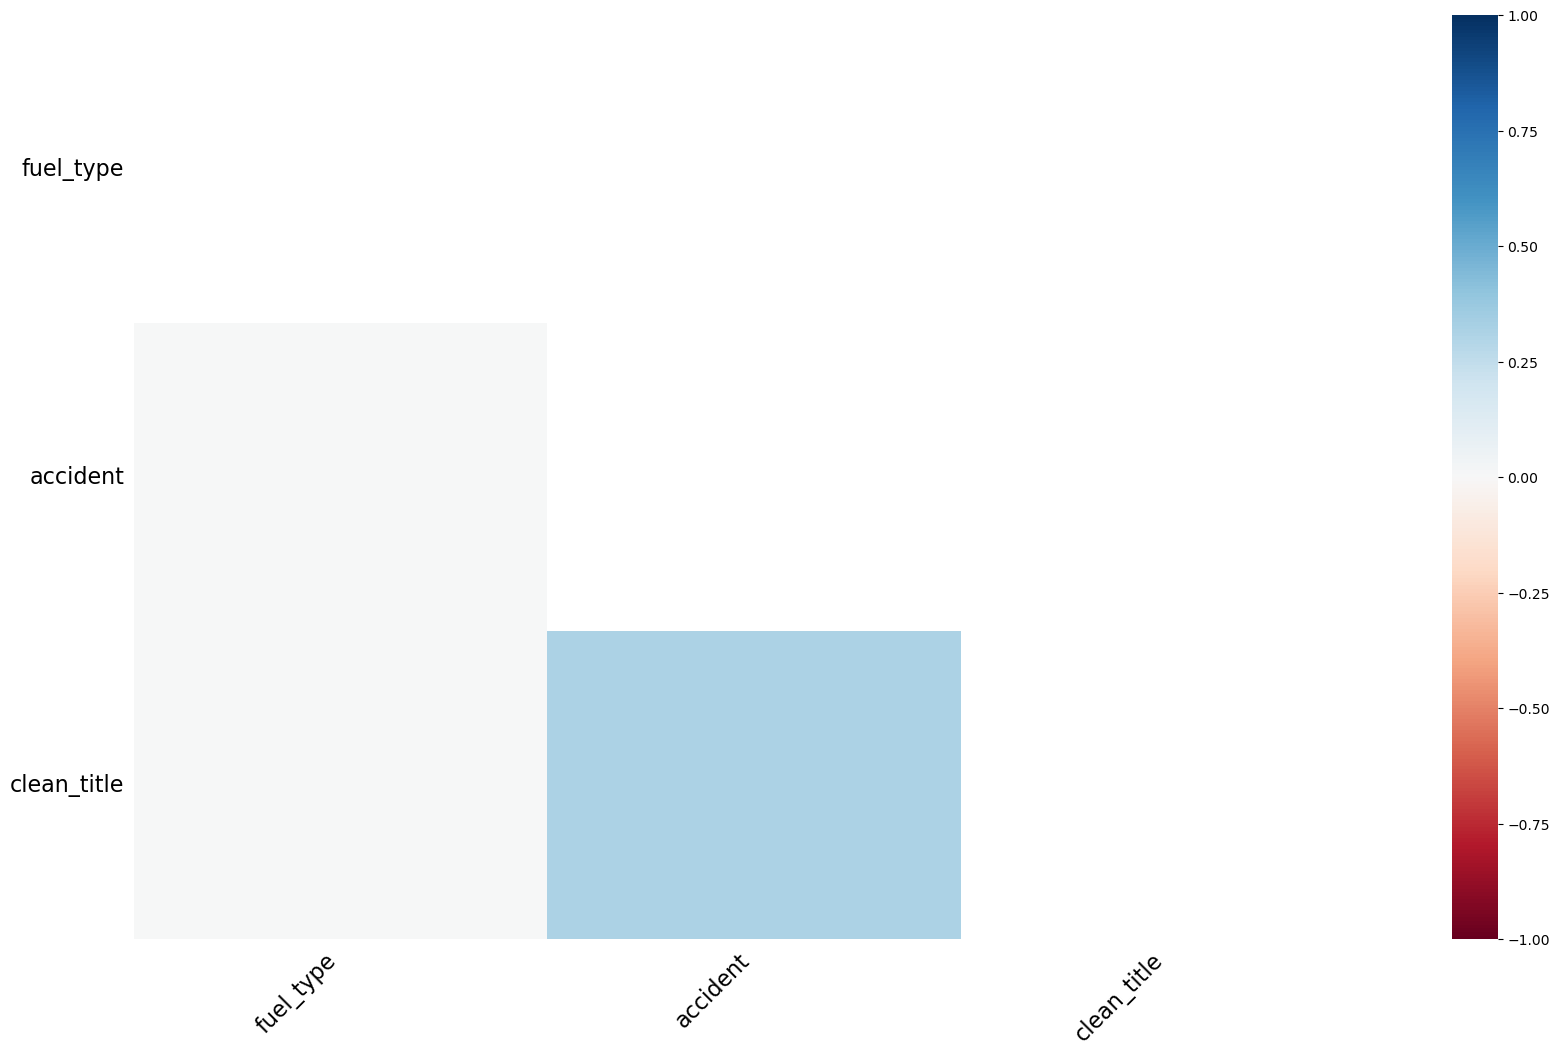

In [50]:
import missingno as msno

# Eksik verileri görselleştirme
plt.figure(figsize=(10,6))
msno.heatmap(train_data)
plt.show()

<Figure size 500x600 with 0 Axes>

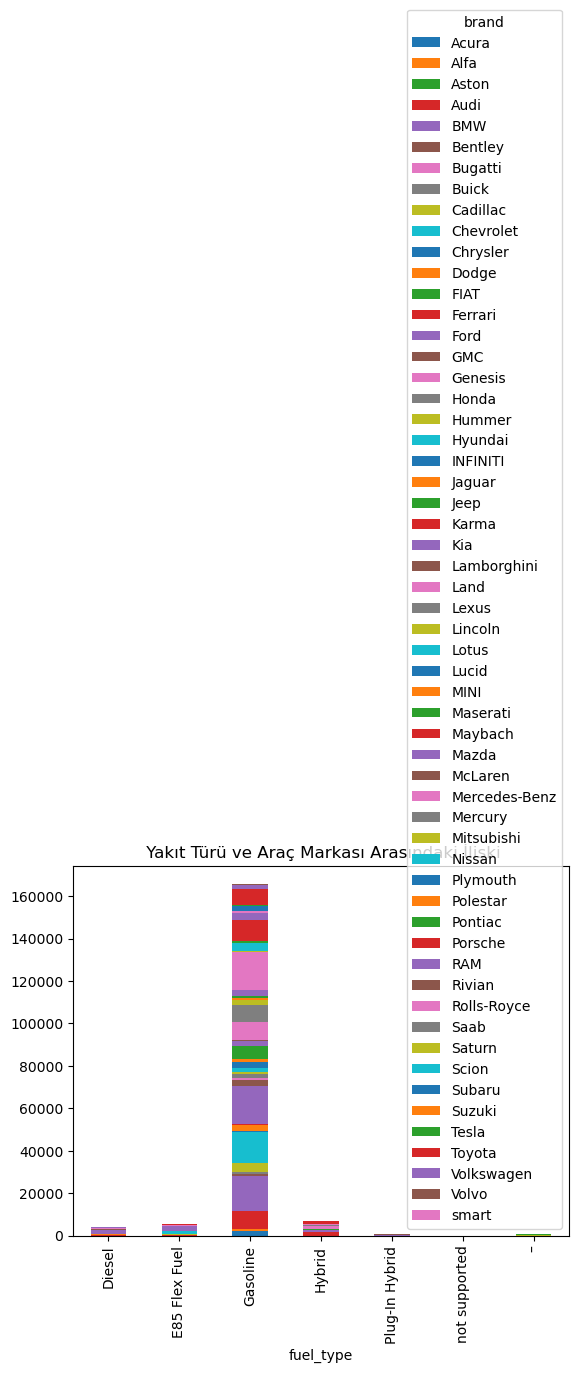

In [51]:
# Yakıt türü ve araç markası arasındaki ilişki
plt.figure(figsize=(5,6))
pd.crosstab(train_data["fuel_type"], train_data["brand"]).plot(kind="bar", stacked = True)
plt.title(" Yakıt Türü ve Araç Markası Arasındaki İlişki")
plt.show()

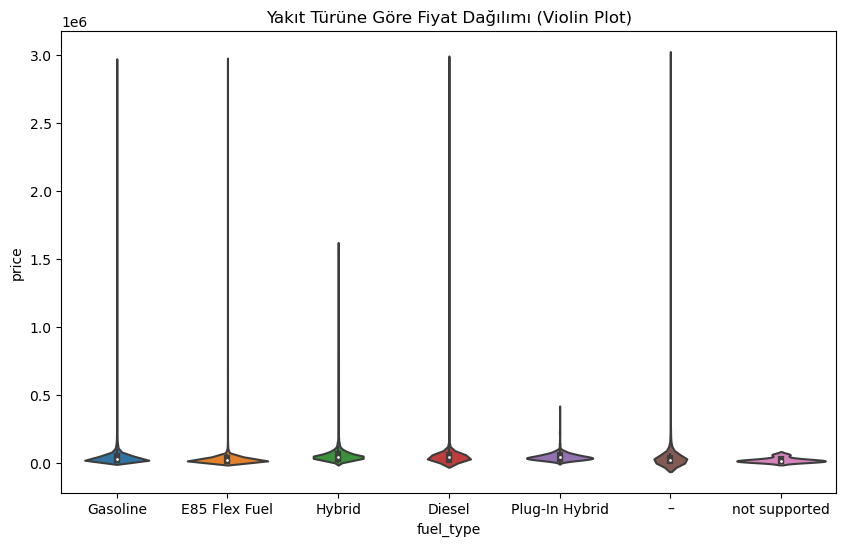

In [52]:
# Fiyat dağılımı violin plot
plt.figure(figsize=(10,6))
sns.violinplot(x="fuel_type", y="price", data = train_data)
plt.title('Yakıt Türüne Göre Fiyat Dağılımı (Violin Plot)')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25552\3539717009.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data['price'], shade=True)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


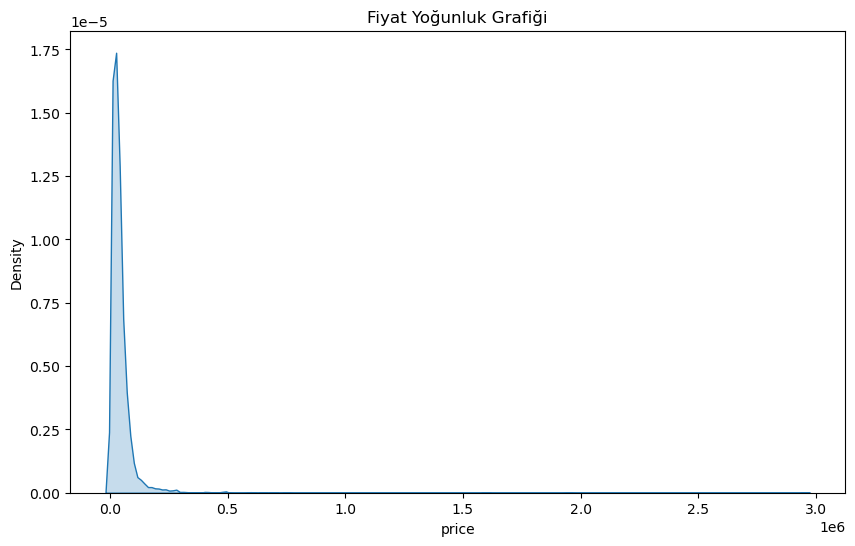

In [53]:
# Fiyat yoğunluk grafiği
plt.figure(figsize=(10,6))
sns.kdeplot(train_data['price'], shade=True)
plt.title('Fiyat Yoğunluk Grafiği')
plt.show()

<Figure size 1200x800 with 0 Axes>

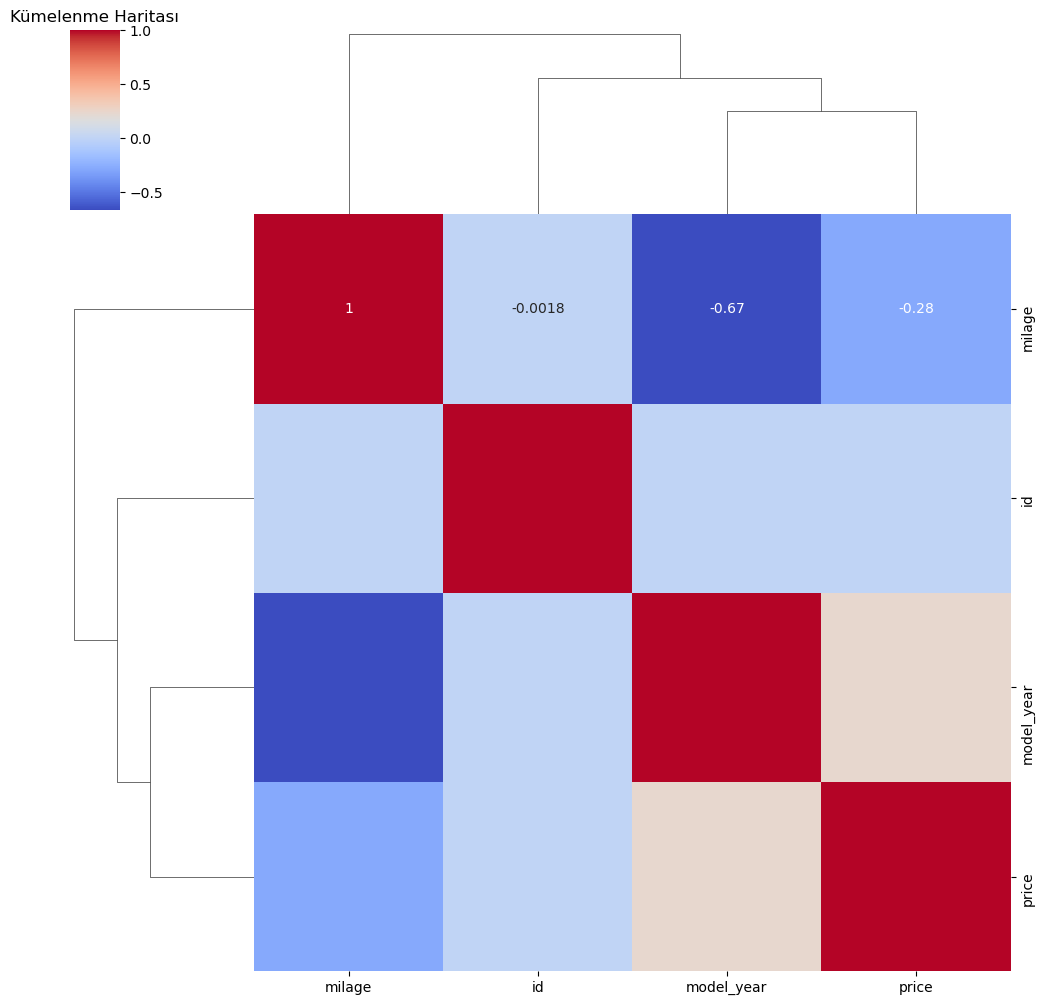

In [54]:
# Kümelenme haritası
plt.figure(figsize=(12,8))
sns.clustermap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Kümelenme Haritası')
plt.show()

## 4. Veri Hazırlığı

In [55]:
# Eksik değerleri doldurma
train_data["brand"].fillna("Unkown", inplace=True)
test_data["brand"].fillna("Unkown", inplace=True)

In [56]:
# Kategorik verileri one-hot encoding ile sayısal değerlere dönüştürme
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ["brand","model","fuel_type","engine","transmission","ext_col","int_col","accident"]
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

In [57]:
categorical_columns

['brand',
 'model',
 'fuel_type',
 'engine',
 'transmission',
 'ext_col',
 'int_col',
 'accident']

In [58]:
# Eğitim ve test verileri için kategorik verileri dönüştürme
encoded_train_data = pd.DataFrame(encoder.fit_transform(train_data[categorical_columns]))
encoded_test_data = pd.DataFrame(encoder.fit_transform(test_data[categorical_columns]))

In [59]:
encoded_train_data

,0,1,2,3,4,5,6,7,8,9,...,3599,3600,3601,3602,3603,3604,3605,3606,3607,3608
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
188529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
188530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
188531,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Dönüştürülmüş verileri orijinal veri setlerine ekleme
train_data = train_data.join(encoded_train_data).drop(columns=categorical_columns)
test_data = test_data.join(encoded_test_data).drop(columns=categorical_columns)

In [ ]:
train_data

In [ ]:
# Test veri kümesinde eksik değerleri doldurmak için yalnızca sayısal sütunları kullanın
numeric_cols_test = test_data.select_dtypes(include=['float64', 'int64']).columns

# Eksik değerleri medyan ile doldurun
train_data[numeric_cols] = train_data[numeric_cols].fillna(train_data[numeric_cols].median())
test_data[numeric_cols_test] = test_data[numeric_cols_test].fillna(test_data[numeric_cols_test].median())

## 5. Model Oluşturma

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Bağımsız ve bağımlı değişkenlerin ayrılması
X = train_data.drop(columns=['price', 'id'])
y = train_data['price']

# Eğitim ve doğrulama setlerinin ayrılması
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli tanımlama
model = RandomForestRegressor(random_state=42)


In [ ]:
X_train.columns = X_train.columns.astype(str)
X_valid.columns = X_valid.columns.astype(str)

In [ ]:
## 6. Model Eğitme

In [ ]:
# Modeli eğitme
model.fit(X_train, y_train)

# Doğrulama seti üzerinde tahmin yapma
y_pred = model.predict(X_valid)

# Modelin RMSE (Root Mean Squared Error) metriğini hesaplama
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"Validation RMSE: {rmse}")


In [ ]:
# Test seti için tahmin yapma
test_X = test_data.drop(columns=['id'])
test_predictions = model.predict(test_X)

# Submission dosyasını oluşturma
submission = pd.DataFrame({
    'id': test_data['id'],
    'price': test_predictions
})

# Dosyayı kaydetme
submission.to_csv('submission_1.csv', index=False)
